# 머신러닝 - SVM 분류
  

**2019-2023 [FinanceData.KR]()**


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
# y = 2 * y - 1

In [ ]:
X[:10], y[:10]

(array([[ 9.24222414,  1.36290933],
        [ 9.17124955,  3.52485535],
        [ 8.84264231,  1.29144424],
        [ 9.13144602,  0.15235637],
        [ 8.66686663,  0.93996493],
        [ 8.76869749,  1.19960487],
        [10.45227689,  1.14179259],
        [ 9.4874227 ,  3.93018752],
        [ 9.55834394,  4.10909742],
        [10.03578098,  4.41764995]]),
 array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1]))

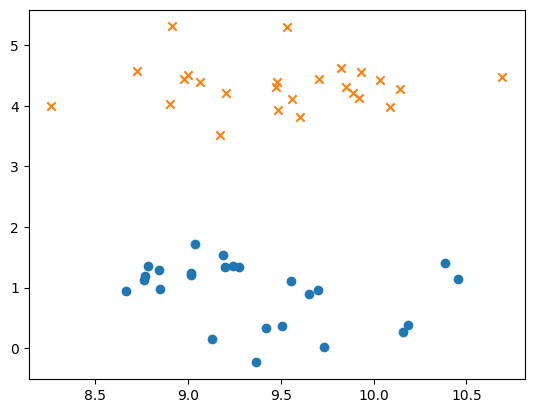

In [ ]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.show()

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1e4)
model = model.fit(X, y)

`SVC` 모델의 속성 값
* `n_support_`: 각 클래스의 서포트의 개수
* `support_`: 각 클래스의 서포트의 인덱스
* `support_vectors_`: 각 클래스의 서포트의 x 값
* `coef_`: $w$ 벡터
* `intercept_`: $-w_0$
* `dual_coef_`: 각 원소가 $a_i \cdot y_i$로 이루어진 벡터

In [ ]:
model.n_support_

array([1, 1], dtype=int32)

In [ ]:
model.support_

array([42,  1], dtype=int32)

In [ ]:
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [ ]:
y[model.support_]

array([0, 1])

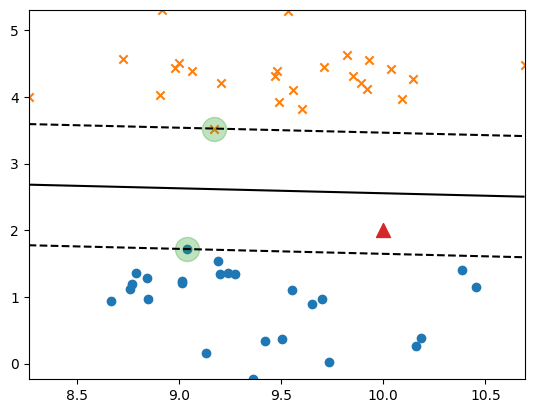

In [ ]:
#@title 서포트 벡터 시각화
import numpy as np

xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.show()

In [ ]:
x_new = [10, 2]
model.decision_function([x_new])

array([-0.61101582])

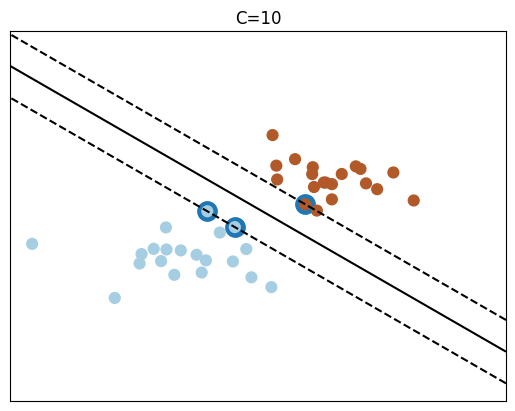

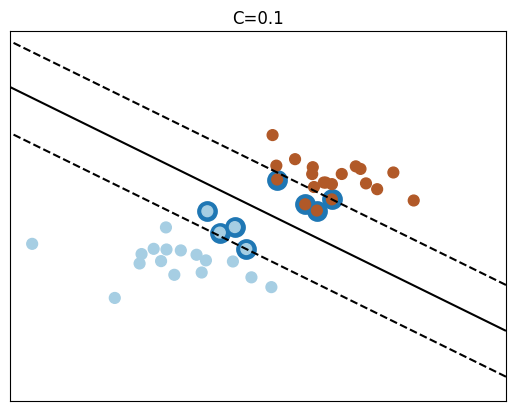

In [ ]:
#@title
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

fignum = 1
for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)

    plt.figure(fignum)

    x_jin = -5; x_jax = 5
    y_jin = -9; y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)

    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.xticks(())
    plt.yticks(())
    plt.title(name)
    plt.axis('tight')
    plt.show()

    fignum += 1

## predict_proba() - 예측 확률 계산

모델의 probability 속성을 True로 주면, predict_proba()를 사용할 수 있다

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 주어진 데이터
X = np.array([[1, 2], [5, 2], [2, 3], [-3, -2], [-4, -2], [-6, -3], [-3, -1]])
y = np.array([1, 1, 1, 0, 0, 0, 1])

# RBF 커널과 확률 예측이 가능한 SVM 모델 생성
clf = SVC(kernel='rbf', probability=True, gamma='scale')
clf.fit(X, y)

# 예측할 새로운 데이터
new_data = np.array([[0, 1], [3, -2], [-5, -1]])

# 클래스 확률 예측
proba_predictions = clf.predict_proba(new_data)

# 각 클래스에 대한 예측 확률 출력
for i, proba in enumerate(proba_predictions):
    print(f"샘플 {i+1} - 클래스 확률: {proba}")

샘플 1 - 클래스 확률: [0.24312903 0.75687097]
샘플 2 - 클래스 확률: [0.3020835 0.6979165]
샘플 3 - 클래스 확률: [0.67245835 0.32754165]


----
**2019-2023 [FinanceData.KR]()**
